## Лабораторная работа 1. Знакомство с библиотеками для анализа данных

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторная работа №1 направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Вы должны не просто написать код функций, но и показать, что написанная вами функция работает корректно, на примерах. 

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [2]:
import numpy as np

**(0.2 балла) Задание 1.** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```indices1``` и ```indices2``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[indices1[0], indices2[0]], ... , X[indices1[N-1], indices2[N-1]]]```

In [12]:
def construct_array(X, indices1, indices2):
    return X[indices1, indices2]

Проверим работу construct_array на матрице из последовательных чисел.

In [20]:
x = np.arange(1, 17).reshape(4,4)
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


Если взять в качестве массивов индексов числа в интервале от 0 до n, где nXn - размерность матрицы, получим значения на главной диагонали.

In [21]:
print(construct_array(x, np.arange(4), np.arange(4)))

[ 1  6 11 16]


Если первый массив задать равным [1,2], а второй - [3,3], то получим значения крайних правых ячеек в двух средних строках.

In [22]:
print(construct_array(x, [1,2], [3, 3]))

[ 8 12]


**(0.2 балла) Задача 2.** Реализуйте функцию, которая на вход принимает два массива ```X``` и ```Y``` (массивы могут быть n-мерные, но их размерности должны совпадать), а возвращает **True** если они равны и **False** - иначе.

In [23]:
def detect_identic(X, Y):
    return np.array_equal(X, Y)

Для проверки возьмем
1) В случае равенства два одинаковых массива произвольной формы
2) В случае неравенства создадим массивы одинаковой формы по разным векторам

In [26]:
print(detect_identic(np.arange(1,17).reshape(2,2,4), np.arange(1,17).reshape(2,2,4)))
print(detect_identic(np.arange(12).reshape(3,2,2), np.arange(1,13).reshape(3,2,2)))

True
False


**(0.2 балла) Задание 3.** Реализуйте функцию, которая на вход принимает цветное изображение ```X``` (трехмерный вектор размера (n, m, 3)) и возвращает среднее значение по трём каналам (вектор длины 3).

In [168]:
def mean_channel(X):
    return X.mean(axis=(0,1))

In [170]:
x = np.arange(12).reshape(2,2,3)
print(x)
print(mean_channel(x))

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
[4.5 5.5 6.5]


**(0.4 балла) Задание 4.** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```a = 3.6``` ответом будет 4.

In [33]:
def nearest_value(X, a):
    return X.flat[np.abs(X - a).argmin()]

Argmin нужен, потому что в функции используется абсолютное значение разности. Функция работает на массивах произвольной формы.
Для проверки построим массив из целых чисел.

In [46]:
x = np.arange(16).reshape(4,4)
print(nearest_value(x, -1))
print(nearest_value(x, 9.1))
print(nearest_value(x, 11.51))
print(nearest_value(x, 7))
print(nearest_value(x, 17))

0
9
12
7
15


**(0.2 балла) Задача 5.** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй - второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [56]:
def construct_matrix(x, y):
    return np.column_stack([x,y])

In [57]:
x = [1, 2, 3]
y = [4, 5, 6]
print(construct_matrix(x,y))

[[1 4]
 [2 5]
 [3 6]]


**(0.4 балла) Задание 6.** Реализуйте функцию, которая на вход принимает вектор ```x```, содержащий целые числа, кроме 0, а возвращает вектор со вставленными нулями между числами.

Например, из ```[1, -5, 3]``` получить ```[1, 0, -5, 0, 3]```

In [83]:
def add_zeros(x):
    y = np.zeros(len(x)*2-1)
    y[::2] = x
    return y

In [84]:
print(add_zeros([1, -5, 3]))

[ 1.  0. -5.  0.  3.]


**(0.4 балла) Задание 7.** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3. Если ненулевых элементов нет, функция должна возвращать ```None```.

In [101]:
def nonzero_product(X):
    d = X.diagonal()
    ind = np.where(d != 0)
    return d[ind].prod() if len(ind[0]) > 0 else None

In [105]:
x = np.diag(np.arange(5))
x[4, 4] = 8
x[3, 3] = 0
print(x)
print(nonzero_product(x))
print()
z = np.zeros((3,3))
print(z)
print(nonzero_product(z))

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 0 0]
 [0 0 0 0 8]]
16

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
None


**(0.6 балла) Задание 8.** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5. Если подходящих элементов нет, функция должна возвращать ```None```.

In [137]:
def max_element(X):
    elts = np.where(X == 0)[0] + 1
    if len(elts) == 0:
        return None
    
    if elts[-1] == len(X):
        elts = elts[:-1]
    if len(elts) == 0:
        return None
    return X[elts].max()

In [139]:
print(max_element(np.array([0, 2, 0, 3, 0, 0, 5, 7, 0])))
print(max_element(np.array([1, 2])))
print(max_element(np.array([1, 2, 0])))

5
None
None


**(0.4 балла) Задача 9.** Реализуйте функцию, которая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

In [156]:
def replace_nans(X):
    nans = np.isnan(X)
    if nans.sum() == X.size:
        mean = 0
    else:
        mean = np.nanmean(X)
    X[np.where(nans == 1)] = mean
    return X

In [157]:
print(replace_nans(np.array([np.nan, 3, 3, np.nan, 4])))
print(replace_nans(np.array([np.nan, np.nan])))

[3.33333333 3.         3.         3.33333333 4.        ]
[0. 0.]


**(0.6 балла) Задача 10.** Напишите функцию, генерирующую [матрицу Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принимающую на вход вектор $(x_1, ... , x_n)$.

В этом задании **запрещается** пользоваться готовыми реализациями (например, [numpy.vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html)), а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).

In [190]:
def vander(x):
    v = np.ones((len(x), len(x)))
    v[:, 1:] = x[:, np.newaxis]
    np.multiply.accumulate(v[:, 1:], out=v[:, 1:], axis=1)
    return v

In [192]:
print(vander(np.arange(2,5)))

[[ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


**(0.4 балла) Задача 11.** Даны две вещественные матрицы ```X``` и ```Y``` с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных [косинусных коэффициентов](https://en.wikipedia.org/wiki/Cosine_similarity) между всеми $X_i и Y_j$, где $X_i$ - $i$-ая строка матрицы $X$, а $Y_j$ - $j$-ая строка матрицы $Y$. 

В этом задании **запрещается** пользоваться готовыми реализациями, а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html), [np.sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) и [np.power](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).

In [244]:
def normalize(X):
    norms = np.sqrt(np.power(X, 2).sum(axis=1))
    norms[np.where(norms == 0)] = 1
    return X / norms[:, np.newaxis]

def count_cosine_similarity(X, Y):
    x_norm = normalize(X)
    y_norm = normalize(Y)
    return np.dot(X, Y)

In [245]:
x = np.arange(8).reshape(2, 4)
print(x)
y = np.arange(6).reshape(2, 3)
print(count_cosine_similarity(x, y))

[[0 1 2 3]
 [4 5 6 7]]


ValueError: shapes (2,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)

**(0.5 балла) Задача 12.** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение.

Для тестирования можно сгенерировать с помощью метода [numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) случайную матрицу и проверить на ней работу метода.

Убедитесь, что в функции не будет происходить деления на ноль, если происходит деление на ноль, то верните **None**.

In [213]:
def scale(X):
    mean = X.mean(axis=0)
    dev = X.std(axis=0)
    if np.any(dev == 0):
        return None
    return (X - mean) / dev

In [215]:
x = np.arange(9).reshape((3,3))
print(x)
print(scale(x))
print()
y = np.repeat([[1,2,3]], 3, axis=0)
print(y)
print(scale(y))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

[[1 2 3]
 [1 2 3]
 [1 2 3]]
None


**(1 балл) Задача 13.** Пусть $N=1000$. Повторите $N$ раз следующий эксперимент: сгенерируйте две матрицы размера $N×N$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? 

При решение задачи для повторения экспериментов воспользуйтесь [list comprehension](https://habrahabr.ru/post/30232/).
Кроме того, воспользуйтесь прогрессбаром для отслежвания прогресса выполнения. Для этого обычно используется библиотека [tqdm](https://tqdm.github.io/), альтернативный вариант - [tqdm_notebook](https://habrahabr.ru/post/276725/).

In [249]:
from tqdm import tqdm
N = 1000
max_elts = [np.max(np.dot(np.random.normal(size=(N, N)), np.random.normal(size=(N, N)))) for i in tqdm(range(N))]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:32<00:00,  7.12it/s]


In [287]:
print('Среднее макс эл-та по экспериментам: {}'.format(np.mean(max_elts)))
print('95-процентная квантиль: {}'.format(np.quantile(max_elts, 0.95)))

Среднее макс эл-та по экспериментам: 154.60772120014252
95-процентная квантиль: 168.76759935465566


### Matplotlib

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**(0.5 баллов) Задача 14.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция [fill_between](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html).    

In [291]:
import matplotlib.pyplot as plt
%matplotlib inline

In [292]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

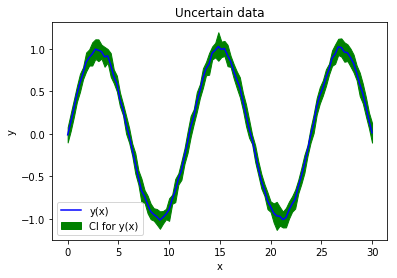

In [293]:
fig, ax = plt.subplots()
ax.set_title("Uncertain data")
ax.set_xlabel("x")
ax.set_ylabel("y")
x, y, error = gen_uncertain_data()
ax.plot(x, y, color='blue', label='y(x)')
ax.fill_between(x, y - error, y + error, color='green', label='CI for y(x)')
ax.legend()

### Аналитика данных с Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

**(1 балл) Задача 15.** 

Загрузите таблицу с признаками пассажиров Титаника из файла ```titanic.csv```.

Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите достоинства/недостаки каждого. Проиллюстрируйте их на примере данного датасета.

In [271]:
import pandas as pd

**(2 балла) Задача 16.**

Загрузите таблицу с данными из ```articles.csv```.

1. Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).
2. Постройте распределение колличества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?
3. Опредилите топ-10 авторов для года с наибольшим количеством публикаций (обратите внимание, что у некоторых статей несколько авторов - это нужно учитывать)
4. Постройте распределение количества публикаций авторов из п. 3 по месяцам, используя [hist plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hist)

In [273]:
articles_data = pd.read_csv('articles.csv')

In [274]:
list(articles_data)

['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'content']

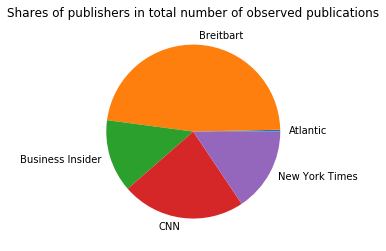

In [314]:
_, pie_ax = plt.subplots()
publisher_groups = articles_data.groupby('publication').size()
publisher_groups.name = ''
publisher_groups.plot.pie(ax=pie_ax, title='Shares of publishers in total number of observed publications')

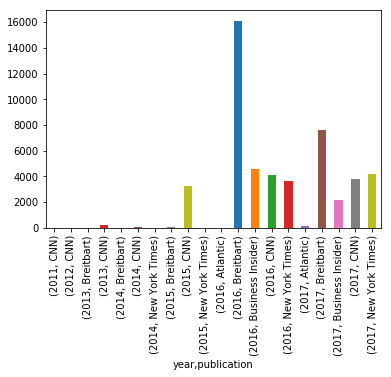

In [313]:
_, bar_x = plt.subplots()
articles_data.groupby(['year', 'publication'], sort=True).size().plot.bar(ax=bar_x)

In [320]:
top_year = articles_data.groupby('year').size().idxmax()
print(top_year)

2016


In [325]:
articles_data.where(articles_data['year'] == top_year).groupby('author').count()

,id,title,publication,date,year,month,content
author,,,,,,,
<strong>Amanda Davies</strong>,1,1,1,1,1,1,1
Danielle Rossingh,1,1,1,1,1,1,1
Patrick Oppmann,1,1,1,1,1,1,1
Ravi Ubha,1,1,1,1,1,1,1
Ray Sanchez,1,1,1,1,1,1,1
Sara Ganim,1,1,1,1,1,1,1
Shachar Peled,1,1,1,1,1,1,1
Sophie Eastaugh,1,1,1,1,1,1,1
Tiffany Ap,1,1,1,1,1,1,1


In [331]:
temp = articles_data.where(articles_data['year'] == top_year)
temp = temp.assign(**{'author':temp['author'].str.split(',|and')})
pd.DataFrame({
    col:np.repeat(temp[col].values, temp['author'].str.len())
    for col in temp.columns.difference(['author'])
    }).assign(**{'author':np.concatenate(temp['author'].values)})[temp.columns.tolist()]

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'